## _PandaML_
- Perform detailed _Exploratory Data Analysis_ (EDA) on STT Data.

In [1]:
import sys, os, glob, yaml

In [2]:
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import trackml.dataset
import seaborn as sns

In [4]:
sys.path.append('src')

### _Dataset_

In [5]:
# mu- data (old)
# input_dir = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (current)
input_dir = './data/'

# pbarp data (coming)
# input_dir = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [6]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)

# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, ''))
                       for f in all_files if f.endswith(suffix))

print("Number of Events Loaded: ", len(file_prefixes))

Number of Events Loaded:  1900


In [7]:
file_prefixes[:10]

['./data/event0000000000',
 './data/event0000000001',
 './data/event0000000002',
 './data/event0000000003',
 './data/event0000000004',
 './data/event0000000005',
 './data/event0000000006',
 './data/event0000000007',
 './data/event0000000008',
 './data/event0000000009']

In [8]:
event_id = 0
event_prefix = file_prefixes[event_id]

In [9]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

# memory usage
mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(os.path.basename(event_prefix), mem_bytes / 2**20))

event0000000000 memory usage 0.03 MB


In [10]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-7.87217,-14.645,35.0,9,0,46
1,2,-7.87217,-15.655,35.0,9,1,153
2,3,-8.74686,-16.160,35.0,9,2,265
3,4,-8.74686,-17.170,35.0,9,3,384
4,5,-8.74686,-18.180,35.0,9,4,509


In [11]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.117062,17100800.0,17.10080,9,0,46,0,2
1,2,0.418876,15175600.0,15.17560,9,1,153,0,2
2,3,0.304087,9510920.0,9.51092,9,2,265,0,2
3,4,0.090621,35418200.0,35.41820,9,3,384,0,2
4,5,0.155938,29981500.0,29.98150,9,4,509,0,2


In [12]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary
0,4,2.427600,1.436890,13.989700,0.213334,0.061650,1.005330,-1,7,-2212,0.684764,1
1,6,-0.876238,-0.518643,2.789560,-0.114157,-0.027715,0.562859,1,9,2212,0.203417,1
2,7,-0.876238,-0.518643,2.789560,-0.069382,-0.080921,0.021450,-1,29,-211,0.203417,1
3,93,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1,161,-11,9.827610,0


In [13]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-7.98408,-14.611200,5.61331,-0.025730,-0.084405,0.006112,1.0,7
1,2,-8.25710,-15.548700,5.68077,-0.023549,-0.084926,0.005711,1.0,7
2,3,-8.43986,-16.238600,5.72753,-0.021873,-0.085211,0.005807,1.0,7
3,4,-8.67184,-17.187599,5.78460,-0.020063,-0.085634,0.004693,1.0,7
4,5,-8.88035,-18.153601,5.83816,-0.017083,-0.086193,0.004707,1.0,7


### _Read Event_

In [14]:
# TODO: Try to use Event.py (from HepTrkX) instead of SttCSVReader,
# although both are similar in many respects but have diffenct purpose.
from src import SttCSVReader, Draw_Reader_Event

In [15]:
reader = SttCSVReader(input_dir, True, True)

In [16]:
event = reader(0)

In [17]:
event.truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-7.98408,-14.611200,5.61331,-0.025730,-0.084405,0.006112,1.0,7
1,2,-8.25710,-15.548700,5.68077,-0.023549,-0.084926,0.005711,1.0,7
2,3,-8.43986,-16.238600,5.72753,-0.021873,-0.085211,0.005807,1.0,7
3,4,-8.67184,-17.187599,5.78460,-0.020063,-0.085634,0.004693,1.0,7
4,5,-8.88035,-18.153601,5.83816,-0.017083,-0.086193,0.004707,1.0,7


In [18]:
event.particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary,pt,peta
0,4,2.427600,1.436890,13.989700,0.213334,0.061650,1.005330,-1,7,-2212,0.684764,1,0.222063,2.215237
1,6,-0.876238,-0.518643,2.789560,-0.114157,-0.027715,0.562859,1,9,2212,0.203417,1,0.117473,2.270683
2,7,-0.876238,-0.518643,2.789560,-0.069382,-0.080921,0.021450,-1,29,-211,0.203417,1,0.106593,0.199899
3,93,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1,161,-11,9.827610,0,0.037963,-0.933359


## _Reconstructable Tracks_

- What fraction of particles are reconstructable if each track leave `nhits > 4` with `pt > 50 MeV`

In [19]:
sum_tp, sum_rp = 0, 0

In [20]:
for i in range(len(file_prefixes)):
    event = reader(i)
        
    truth_particles = event.particles.merge(event.truth, on='particle_id', how='left')
    sum_tp += np.unique(truth_particles.particle_id).size
    
    truth_particles = truth_particles[truth_particles.nhits > 4]                 # particles with nhits > 4
    reconstructable_particles = truth_particles[truth_particles.pt > 0.05]       # particles with pt > 50 MeV
    sum_rp += np.unique(reconstructable_particles.particle_id).size    

In [35]:
print("Number of Events: ", len(file_prefixes))

Number of Events:  1900


In [21]:
print("True Tracks: ", sum_tp)

True Tracks:  7721


In [22]:
print("Reco Tracks: ", sum_rp)

Reco Tracks:  6114


In [23]:
print("fraction of reconstructable particles (n > 4 and pt > 50MeV): {:.3f}".format((sum_rp/sum_tp)*100))

fraction of reconstructable particles (n > 4 and pt > 50MeV): 79.187


### _Detector Layout_

In [24]:
def draw_single_event(event=None, event_id=9999, name="event", figsize=(10, 10), save_fig=False):
    """Draw a Single Event"""
    p_ids = np.unique(particles.particle_id.values)
    det = pd.read_csv("src/stt.csv")
    # plt.style.use('seaborn')
    # fig = plt.gcf()
    fig = plt.figure(figsize=figsize)
    skw = det.query('skewed==0')
    nkw = det.query('skewed==1')
    plt.scatter(skw.x.values, skw.y.values, s=20, facecolors='none', edgecolors='lightgreen')
    plt.scatter(nkw.x.values, nkw.y.values, s=20, facecolors='none', edgecolors='coral')
    for i in p_ids:
        df_ = hits.loc[truth.particle_id == i]
        plt.scatter(df_.x.values, df_.y.values, s=(tubes.loc[truth.particle_id == i].isochrone*100).values, label='particle-id: %d' % i)
    plt.title('Event ID # %d' % event_id)
    plt.xlabel('x [cm]', fontsize=10)
    plt.ylabel('y [cm]', fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim((-41, 41))
    plt.ylim((-41, 41))
    plt.grid(False)
    plt.legend(fontsize=10, loc='best')

    plt.tight_layout()
    if save_fig:
        plt.savefig(name+'_%d.png' % event_id)
    return fig

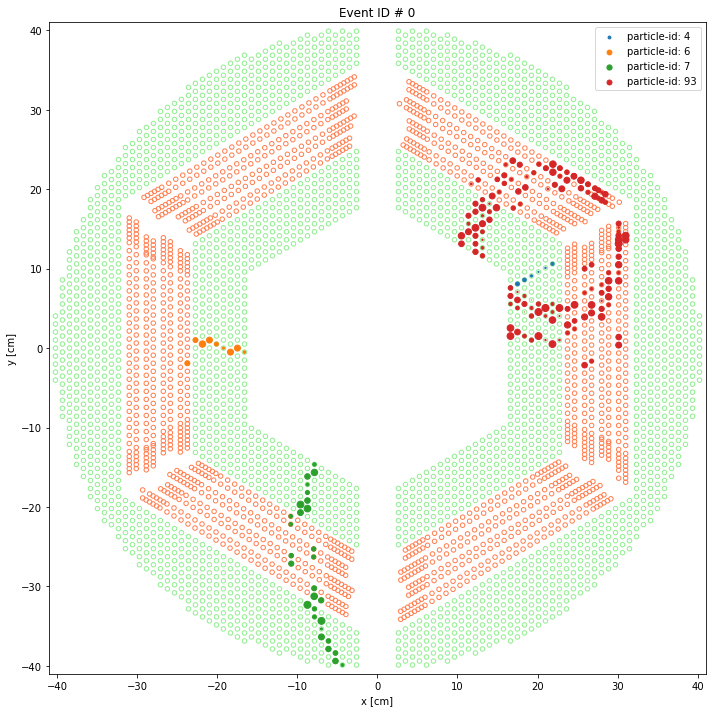

In [25]:
draw_single_event(hits, event_id, "event", (10, 10), False);

### _Draw Tracks_

In [26]:
# preprocess hits
# hits['r'] = hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1)
hits_ = hits.assign(r=hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1))
hits_.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r
0,1,-7.87217,-14.645,35.0,9,0,46,16.626698
1,2,-7.87217,-15.655,35.0,9,1,153,17.522844
2,3,-8.74686,-16.160,35.0,9,2,265,18.375341
3,4,-8.74686,-17.170,35.0,9,3,384,19.269573
4,5,-8.74686,-18.180,35.0,9,4,509,20.174736


In [27]:
# we already have sorted hits, lets draw a single track.
data = hits_[truth.particle_id == particles.iloc[1,0]]
data

,hit_id,x,y,z,volume_id,layer_id,module_id,r
29,30,-16.618999,-0.50500,35.0,9,0,27,16.626670
30,31,-17.493700,0.00000,35.0,9,1,132,17.493700
31,32,-18.368401,-0.50500,35.0,9,2,244,18.375341
32,33,-19.243099,0.00000,35.0,9,3,361,19.243099
33,34,-20.117800,0.50500,35.0,9,4,484,20.124137
34,35,-20.992500,1.01000,35.0,9,5,613,21.016783
35,36,-21.867100,0.50500,35.0,9,6,749,21.872930
36,37,-22.741800,1.01000,35.0,9,7,890,22.764217
37,38,-23.751801,-1.90781,35.0,9,8,1044,23.828298


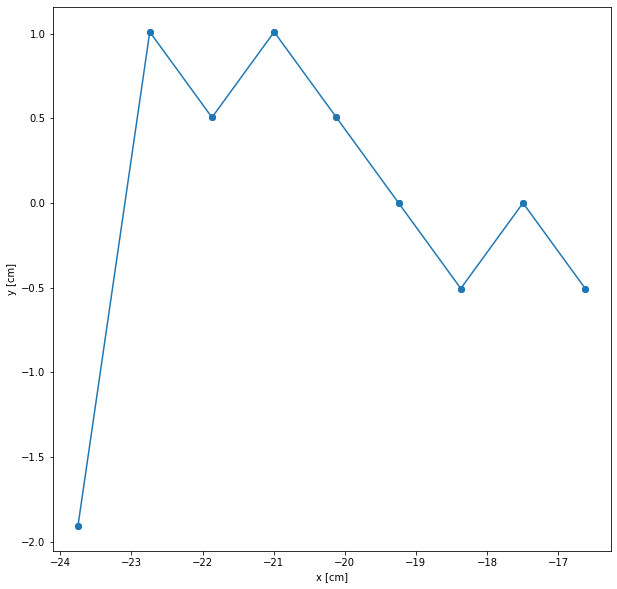

In [28]:
# Using Object Oriented API
plt.close('all')
plt.figure(figsize=(10,10))
plt.scatter(data.x.values, data.y.values)
plt.plot(data.x.values, data.y.values, "-o")
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
#plt.xlim(-40, 40)
#plt.ylim(-40, 40)
# plt.savefig(os.path.join(outdir, "event.png"))
plt.show()

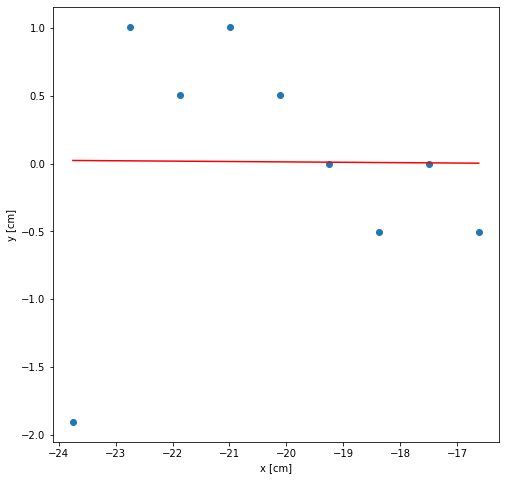

In [29]:
# numpy.polyfit() function
plt.close('all')
plt.figure(figsize=(8,8))

a, b = np.polyfit(data.x, data.y, 1)

plt.scatter(data.x.values, data.y.values)
plt.plot(data.x.values, a*data.x.values+b, 'r')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
#plt.xlim((5, 40))
#plt.ylim((5, 40))
plt.show()

### _Momentum Distributions_

In [30]:
# calculate & assign pt
particles = particles.assign(pt=np.sqrt(particles.px**2 + particles.py**2))

In [31]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary,pt
0,4,2.427600,1.436890,13.989700,0.213334,0.061650,1.005330,-1,7,-2212,0.684764,1,0.222063
1,6,-0.876238,-0.518643,2.789560,-0.114157,-0.027715,0.562859,1,9,2212,0.203417,1,0.117473
2,7,-0.876238,-0.518643,2.789560,-0.069382,-0.080921,0.021450,-1,29,-211,0.203417,1,0.106593
3,93,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1,161,-11,9.827610,0,0.037963


In [32]:
particles.pt

0    0.222063
1    0.117473
2    0.106593
3    0.037963
Name: pt, dtype: float32

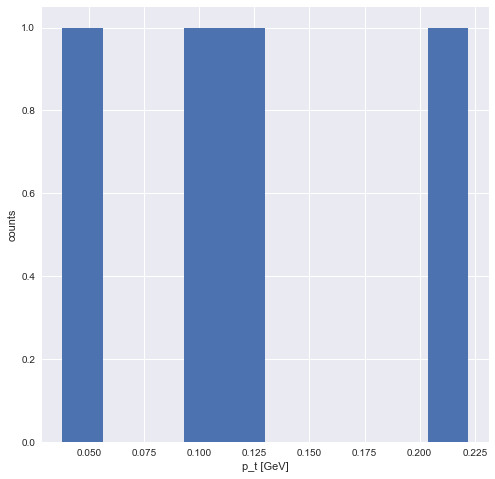

In [33]:
plt.close('all')
plt.style.use('seaborn')
fig = plt.figure(figsize=(8,8))

plt.hist(particles.pt, bins=10)

plt.xlabel('p_t [GeV]')
plt.ylabel('counts')
# plt.xlim((0.1, 1.5))
#plt.ylim((5, 40))
plt.show()

In [34]:
# find average hits per track
print("Average number of hits per tracks: {}".format(hits.hit_id.count()/particles.particle_id.unique().size))

Average number of hits per tracks: 51.5
